2      2000
17     2001
32     2002
47     2003
62     2004
77     2005
92     2006
107    2007
122    2008
137    2009
152    2010
167    2011
182    2012
197    2013
212    2014
227    2015
242    2016
257    2017
Name: Year, dtype: int64

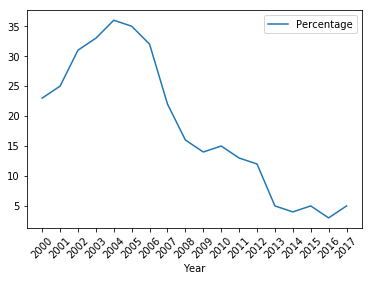

In [2]:
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("/Users/jameschen/Dropbox/GradSchool/*Spring_18/hort503/ClassExercises/Mar1/corn.csv")
df = df.rename(columns = {'Genetically engineered (GE) corn varieties by State and United States, 2000-17':'State'})

bt = pd.melt(frame = df.iloc[3:18, 0:19], id_vars = ["State"], var_name="Year", value_name="Percentage")
bt["Year"] = bt['Year'].str.extract('(\d+)', expand=False).astype(int) + 1999
bt["Variety"] = "BT"
bt["Percentage"] = bt["Percentage"].dropna().astype(int)

herb_temp = df.iloc[3:18, 19:37]
herb_temp["State"] = df.iloc[3:18, 0]
herb = pd.melt(frame = herb_temp, id_vars = ["State"], var_name="Year", value_name="Percentage")
herb["Year"] = herb['Year'].str.extract('(\d+)', expand=False).astype(int) + 1981
herb["Variety"] = "Herbicide"
herb["Percentage"] = herb["Percentage"].dropna().astype(int)

new_df = bt.append(herb)
new_df["Crop"] = "Corn"
new_df["Crop Title"] = "Genetically engineered (GE) corn"
new_df["Unit"] = "Percent of all corn plantted"

iowa_BT = new_df[(new_df["State"] == "Iowa") & (new_df["Variety"] == "BT")]
iowa_BT
tick = iowa_BT['Year'].sort_values()
iowa_BT.plot(x = 'Year', y = 'Percentage', xticks = tick, rot = 45)
iowa_BT['Year']

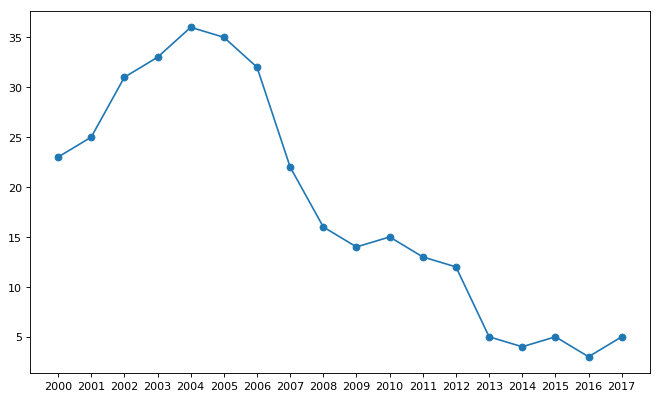

In [7]:
plt.figure(figsize=(10,6), dpi=80)
plt.xticks(iowa_BT['Year'], iowa_BT['Year'])
plt.plot(iowa_BT['Year'], iowa_BT['Percentage'], '-o')